/home/mranzinger/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mranzinger/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mranzinger/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mranzinger/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

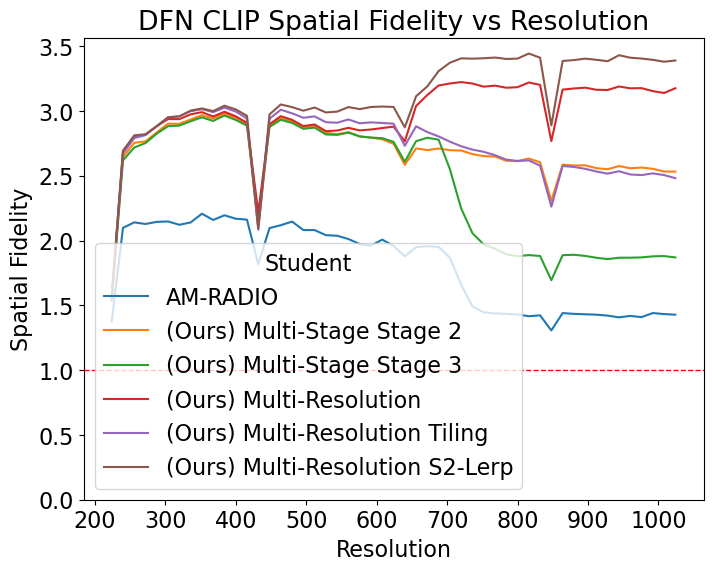

/home/mranzinger/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mranzinger/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mranzinger/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mranzinger/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

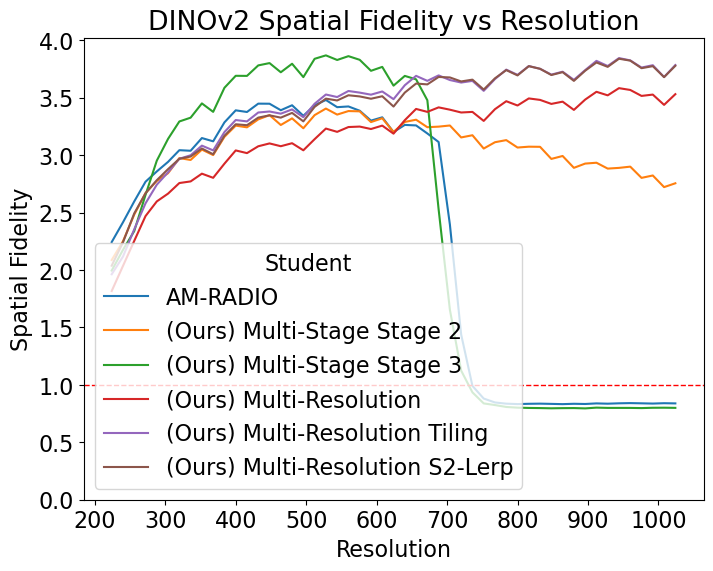

/home/mranzinger/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mranzinger/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mranzinger/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mranzinger/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

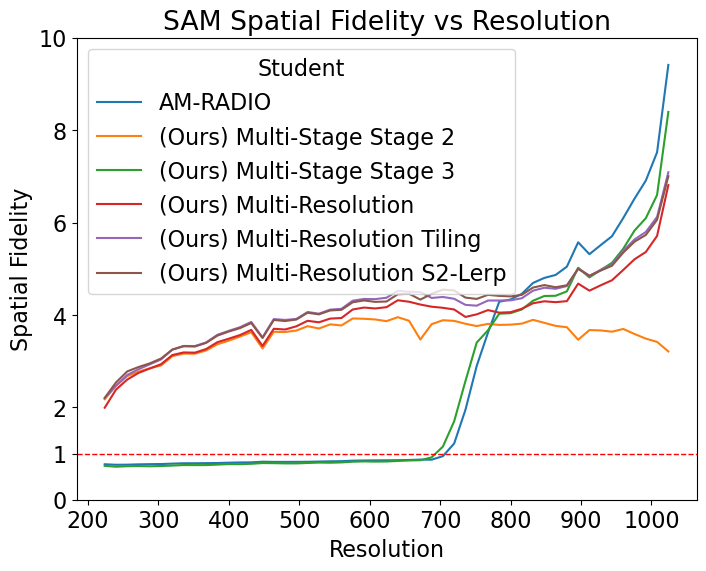

In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data_order = [
    'AM-RADIO',
    '(Ours) Multi-Stage Stage 2',
    '(Ours) Multi-Stage Stage 3',
    '(Ours) Multi-Resolution',
    '(Ours) Multi-Resolution Tiling',
    '(Ours) Multi-Resolution S2-Lerp',
]

PREFIX = 'mode-switching_'
data_files = []
for fname in os.listdir('..'):
    if fname.startswith(PREFIX):
        fpath = f'../{fname}'
        df = pd.read_csv(fpath)

        sname = os.path.splitext(fname)[0]
        _, teacher_name, student_name = sname.split('_')

        data_files.append((df, (teacher_name, student_name)))
data_files.sort(key=lambda t: data_order.index(t[1][1]))

for df, (teacher_name, student_name) in data_files:
    df['student_name'] = student_name
    df['teacher_name'] = teacher_name

all_data = pd.concat(list(df[0] for df in data_files), ignore_index=True)

# Get the unique teacher names
unique_teachers = all_data['teacher_name'].unique()

# Create directory for saving plots
os.makedirs('../assets/cvpr25', exist_ok=True)

# Create a separate plot for each teacher_name
for teacher in unique_teachers:
    # Filter data for the current teacher
    teacher_data = all_data[all_data['teacher_name'] == teacher]

    # Create a new figure for each teacher
    plt.figure(figsize=(8, 6))
    plt.rcParams.update({'font.size': 16})

    # Plotting Fidelity vs Resolution for the current teacher_name
    sns.lineplot(
        data=teacher_data,
        x='Resolution',
        y='Fidelity',
        hue='student_name',  # Controls the line color for different student_names
        markers=True,
        dashes=False,
    )
    # # Plot Fidelity vs Resolution for each student_name for the current teacher
    # unique_students = teacher_data['student_name'].unique()
    # markers = ['o', 'x', 's', '*', 'd']  # Different markers for different students

    # for i, student in enumerate(unique_students):
    #     student_data = teacher_data[teacher_data['student_name'] == student]
    #     plt.plot(
    #         student_data['Resolution'],
    #         student_data['Fidelity'],
    #         label=student,
    #         marker=markers[i % len(markers)],  # Cycle through markers
    #         linestyle='-',  # Solid lines
    #         linewidth=1.5
    #     )

    # Add a horizontal line at y = 1
    plt.axhline(y=1, color='r', linestyle='--', linewidth=1)

    # Ensure that there is a tick for y = 1
    current_ticks = plt.yticks()[0]  # Get current tick values
    if 1 not in current_ticks:
        plt.yticks(list(current_ticks) + [1])  # Add y=1 to tick values

    # Adding titles and labels
    plt.title(f'{teacher} Spatial Fidelity vs Resolution')
    plt.xlabel('Resolution')
    plt.ylabel('Spatial Fidelity')
    plt.legend(title='Student')
    plt.ylim(bottom=0)

    # Save the plot
    plot_path = f'../assets/cvpr25/mode_switching_fidelity_{teacher}.pdf'
    plt.savefig(plot_path, format='pdf')

    # Show the plot
    plt.show()
